In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
data = pd.read_csv(r"C:\Users\Kshit\Desktop\Data analysis\uber project\UberDataset.csv")


In [15]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [ ]:
# Data Preprocessing
# Convert Date/Time to datetime object

In [23]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce', infer_datetime_format=True)
data['Hour'] = data['START_DATE'].dt.hour  # Extracting hour

C:\Users\Kshit\AppData\Local\Temp\ipykernel_95392\2794663254.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce', infer_datetime_format=True)


In [ ]:
# Exploratory Data Analysis
# Plotting the number of trips per hour

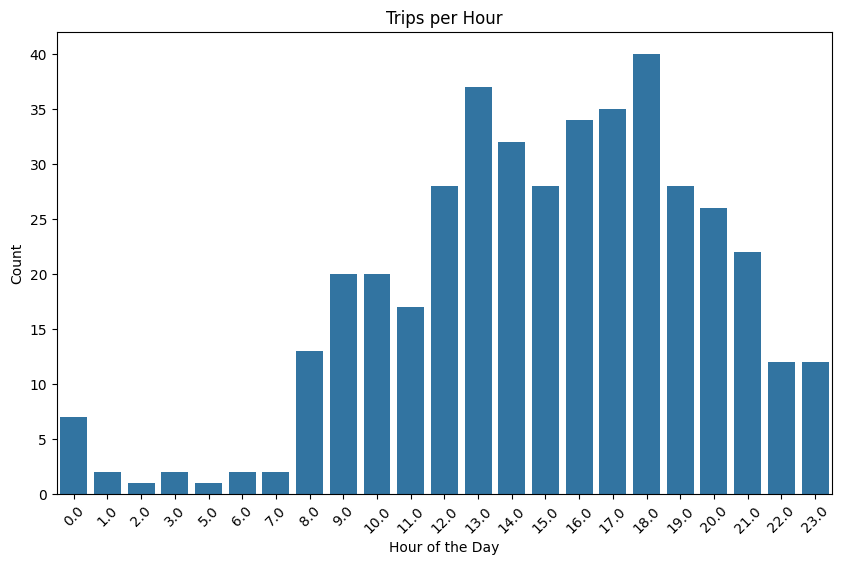

In [24]:
# %%

plt.figure(figsize=(10,6))
sns.countplot(x=data['Hour'])
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Plotting the number of trips per day of the week
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce', infer_datetime_format=True)
data['Day_of_Week'] = data['START_DATE'].dt.day_name()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_95392\217967688.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce', infer_datetime_format=True)


C:\Users\Kshit\AppData\Local\Temp\ipykernel_95392\4220349161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Day_of_Week'], order=order, palette='viridis')


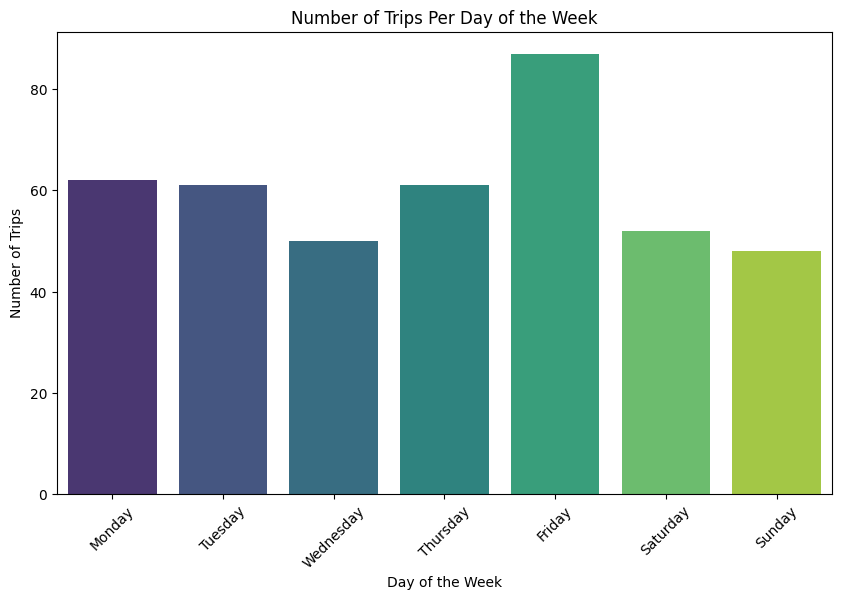

In [27]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.countplot(x=data['Day_of_Week'], order=order, palette='viridis')

plt.title('Number of Trips Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Feature Engineering
# Create dummy variables for categorical features
print(data.dtypes)

START_DATE     datetime64[ns]
END_DATE               object
CATEGORY               object
START                  object
STOP                   object
MILES                 float64
PURPOSE                object
Hour                  float64
Day_of_Week            object
dtype: object


In [30]:
data.rename(columns=lambda x: x.strip(), inplace=True)  # Removes extra spaces



In [31]:
if 'dispatching_base_number' in data.columns and 'Day_of_Week' in data.columns:
    print("Both columns exist!")
else:
    print("One or both columns are missing!")

One or both columns are missing!


In [32]:
existing_categorical_columns = [col for col in ['dispatching_base_number', 'Day_of_Week'] if col in data.columns]
data = pd.get_dummies(data, columns=existing_categorical_columns, drop_first=True)

In [33]:
print(data.head())

           START_DATE          END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00  01-01-2016 21:17  Business  Fort Pierce   
1 2016-01-02 01:25:00  01-02-2016 01:37  Business  Fort Pierce   
2 2016-01-02 20:25:00  01-02-2016 20:38  Business  Fort Pierce   
3 2016-01-05 17:31:00  01-05-2016 17:45  Business  Fort Pierce   
4 2016-01-06 14:42:00  01-06-2016 15:49  Business  Fort Pierce   

              STOP  MILES          PURPOSE  Hour  Day_of_Week_Monday  \
0      Fort Pierce    5.1   Meal/Entertain  21.0               False   
1      Fort Pierce    5.0              NaN   1.0               False   
2      Fort Pierce    4.8  Errand/Supplies  20.0               False   
3      Fort Pierce    4.7          Meeting  17.0               False   
4  West Palm Beach   63.7   Customer Visit  14.0               False   

   Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
0                 False               False                 False   
1                  True         

In [34]:
print(data.head())  # Check if the dataset is as expected
print(data.info())  # Check if 'dispatching_base_number' exists

           START_DATE          END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00  01-01-2016 21:17  Business  Fort Pierce   
1 2016-01-02 01:25:00  01-02-2016 01:37  Business  Fort Pierce   
2 2016-01-02 20:25:00  01-02-2016 20:38  Business  Fort Pierce   
3 2016-01-05 17:31:00  01-05-2016 17:45  Business  Fort Pierce   
4 2016-01-06 14:42:00  01-06-2016 15:49  Business  Fort Pierce   

              STOP  MILES          PURPOSE  Hour  Day_of_Week_Monday  \
0      Fort Pierce    5.1   Meal/Entertain  21.0               False   
1      Fort Pierce    5.0              NaN   1.0               False   
2      Fort Pierce    4.8  Errand/Supplies  20.0               False   
3      Fort Pierce    4.7          Meeting  17.0               False   
4  West Palm Beach   63.7   Customer Visit  14.0               False   

   Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
0                 False               False                 False   
1                  True         

In [35]:
categorical_columns = ['CATEGORY', 'START', 'STOP', 'PURPOSE']  # Adjust based on actual data
existing_categorical_columns = [col for col in categorical_columns if col in data.columns]

data = pd.get_dummies(data, columns=existing_categorical_columns, drop_first=True)


In [36]:
print(data.head())  # Preview the dataset
print(data.info())  # Ensure no KeyErrors


           START_DATE          END_DATE  MILES  Hour  Day_of_Week_Monday  \
0 2016-01-01 21:11:00  01-01-2016 21:17    5.1  21.0               False   
1 2016-01-02 01:25:00  01-02-2016 01:37    5.0   1.0               False   
2 2016-01-02 20:25:00  01-02-2016 20:38    4.8  20.0               False   
3 2016-01-05 17:31:00  01-05-2016 17:45    4.7  17.0               False   
4 2016-01-06 14:42:00  01-06-2016 15:49   63.7  14.0               False   

   Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
0                 False               False                 False   
1                  True               False                 False   
2                  True               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   Day_of_Week_Tuesday  Day_of_Week_Wednesday  ...  STOP_Winston Salem  \
0                False                  False  ...    

In [37]:
# Convert START_DATE and END_DATE to datetime, handling different formats
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

# Check if any values failed to convert (NaT means "Not a Time")
print(data[['START_DATE', 'END_DATE']].isna().sum())


START_DATE    735
END_DATE      736
dtype: int64


In [38]:
data['Year'] = data['START_DATE'].dt.year
data['Month'] = data['START_DATE'].dt.month
data['Day'] = data['START_DATE'].dt.day
data['Hour'] = data['START_DATE'].dt.hour
data['Weekday'] = data['START_DATE'].dt.day_name()  # e.g., Monday, Tuesday


In [39]:
data = pd.get_dummies(data, columns=['Weekday'], drop_first=True)


In [40]:
# Ensure START_DATE and END_DATE are datetime objects
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

# Calculate trip duration in minutes
data['Trip_Duration_Minutes'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60

# Display the first few values
print(data[['START_DATE', 'END_DATE', 'Trip_Duration_Minutes']].head())


           START_DATE            END_DATE  Trip_Duration_Minutes
0 2016-01-01 21:11:00 2016-01-01 21:17:00                    6.0
1 2016-01-02 01:25:00 2016-01-02 01:37:00                   12.0
2 2016-01-02 20:25:00 2016-01-02 20:38:00                   13.0
3 2016-01-05 17:31:00 2016-01-05 17:45:00                   14.0
4 2016-01-06 14:42:00 2016-01-06 15:49:00                   67.0


In [41]:
print(data[['START_DATE', 'END_DATE', 'Trip_Duration_Minutes']].isna().sum())


START_DATE               735
END_DATE                 736
Trip_Duration_Minutes    736
dtype: int64


In [43]:
median_duration = data['Trip_Duration_Minutes'].median()
data['Trip_Duration_Minutes'].fillna(median_duration, inplace=True)


C:\Users\Kshit\AppData\Local\Temp\ipykernel_95392\856582227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trip_Duration_Minutes'].fillna(median_duration, inplace=True)


In [44]:
#Speed (mph or km/h):

data['Speed_MPH'] = data['MILES'] / (data['Trip_Duration_Minutes'] / 60)


In [ ]:
#Remove unrealistic speeds ( > 100 mph):
data = data[data['Speed_MPH'] < 100]


In [46]:
#Peak vs. Off-Peak Analysis

data['Is_Peak_Hour'] = data['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)


In [47]:
print(data[['START_DATE', 'END_DATE', 'Trip_Duration_Minutes', 'Speed_MPH']].head())


           START_DATE            END_DATE  Trip_Duration_Minutes  Speed_MPH
0 2016-01-01 21:11:00 2016-01-01 21:17:00                    6.0  51.000000
1 2016-01-02 01:25:00 2016-01-02 01:37:00                   12.0  25.000000
2 2016-01-02 20:25:00 2016-01-02 20:38:00                   13.0  22.153846
3 2016-01-05 17:31:00 2016-01-05 17:45:00                   14.0  20.142857
4 2016-01-06 14:42:00 2016-01-06 15:49:00                   67.0  57.044776


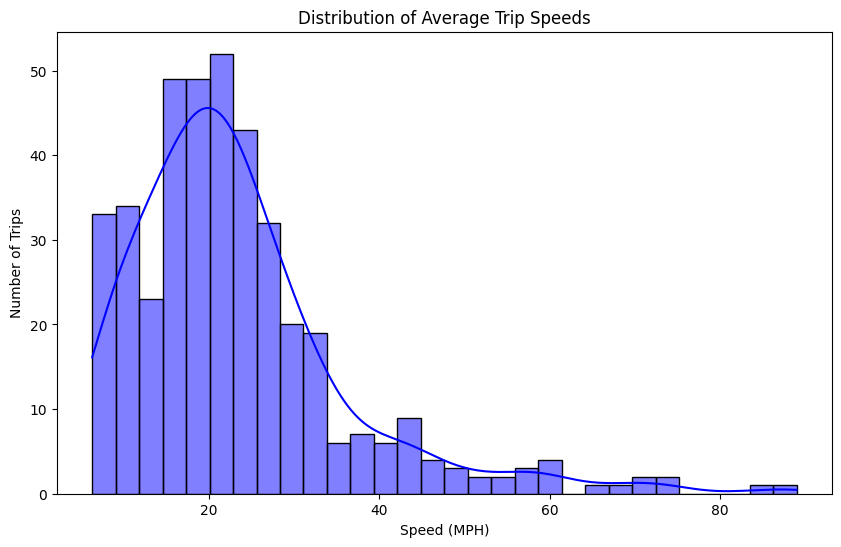

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Speed_MPH'], bins=30, kde=True, color='blue')
plt.xlabel('Speed (MPH)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Average Trip Speeds')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['START_DATE'].dt.day_name(), y=data['Speed_MPH'], palette='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Speed (MPH)')
plt.title('Trip Speeds by Day of the Week')
plt.xticks(rotation=45)
plt.show()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_95392\905717299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['START_DATE'].dt.day_name(), y=data['Speed_MPH'], palette='coolwarm')


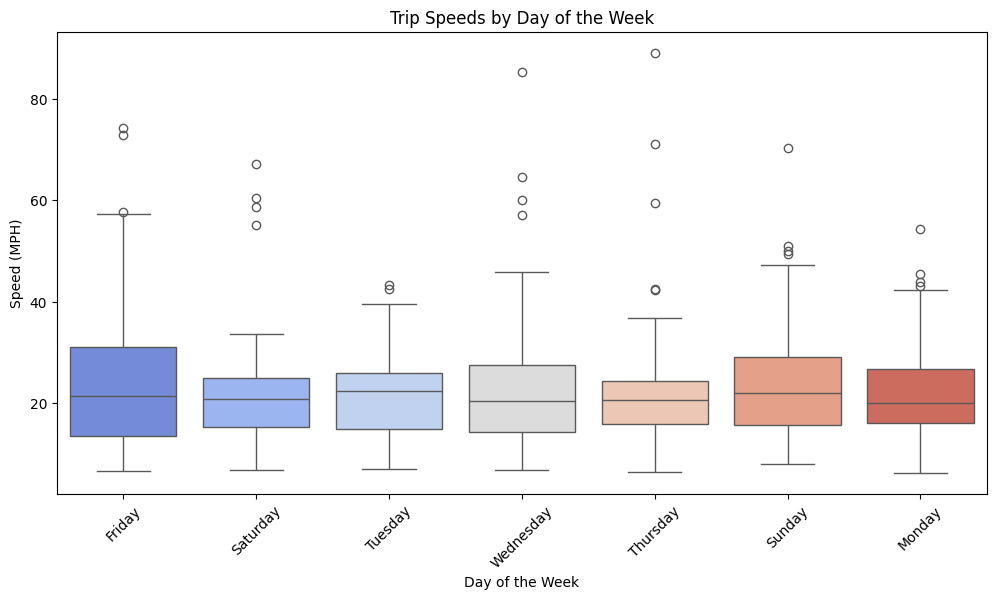

In [49]:
# Boxplot of Speeds by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['START_DATE'].dt.day_name(), y=data['Speed_MPH'], palette='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Speed (MPH)')
plt.title('Trip Speeds by Day of the Week')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Scatter Plot: Speed vs. Trip Duration To check if longer trips tend to be slower or faster.

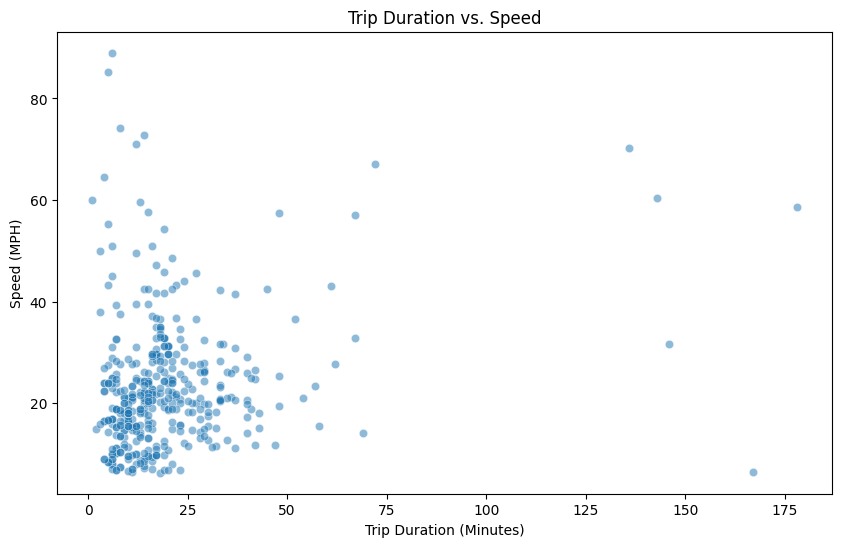

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Trip_Duration_Minutes'], y=data['Speed_MPH'], alpha=0.5)
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Speed (MPH)')
plt.title('Trip Duration vs. Speed')
plt.show()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_95392\1787095789.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data['Hour'], y=data['Speed_MPH'], estimator='mean', ci=None, marker='o', color='red')


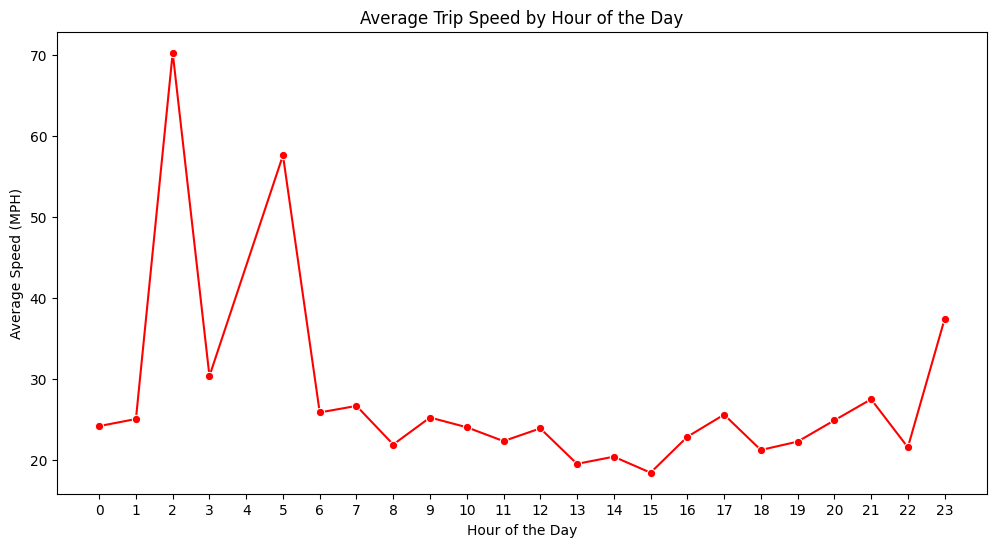

In [51]:
# Average Speed by Hour of the Day , To see if traffic congestion affects speed.

plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Hour'], y=data['Speed_MPH'], estimator='mean', ci=None, marker='o', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (MPH)')
plt.title('Average Trip Speed by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()


In [52]:
# # Split the data into training and testing sets

X = data[['MILES', 'Hour', 'Day_of_Week_Monday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 
          'Day_of_Week_Thursday', 'Day_of_Week_Friday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday']]
y = data['Speed_MPH']  # Target variable


KeyError: "['Day_of_Week_Friday'] not in index"

In [53]:
print(data.columns)


Index(['START_DATE', 'END_DATE', 'MILES', 'Hour', 'Day_of_Week_Monday',
       'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       ...
       'Day', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday',
       'Trip_Duration_Minutes', 'Speed_MPH', 'Is_Peak_Hour'],
      dtype='object', length=395)


In [54]:
# Find actual available weekday columns
weekday_columns = [col for col in data.columns if 'Weekday_' in col]

# Feature selection
X = data[['MILES', 'Hour'] + weekday_columns]
y = data['Speed_MPH']  # Target variable

print(X.columns)  # Check selected features


Index(['MILES', 'Hour', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')


In [55]:
print(X.columns)


Index(['MILES', 'Hour', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')


In [ ]:
# Split the Data into Training & Testing Sets

In [59]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['MILES', 'Hour', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
          'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday']]
y = data['Speed_MPH']  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
#Train the Random Forest Model

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
# Predict on test data
y_pred = rf_model.predict(X_test)


In [62]:
#  Evaluate Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"📊 Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


TypeError: got an unexpected keyword argument 'squared'

In [63]:
from sklearn.metrics import mean_squared_error


In [64]:
print(y_test.head(), y_pred[:5])  # Ensure they contain numeric values


183    31.263158
520    31.263158
632    18.000000
71     24.000000
80     24.428571
Name: Speed_MPH, dtype: float64 [30.77252833 31.11878829 12.6411398  10.9010979  23.54630083]


In [65]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [66]:
print(f"RMSE: {rmse}")

RMSE: 11.37591485352908


In [67]:
# RMSE is 11.38, which means your model's average error in predicting speed is around 11.38 mph.

In [ ]:
# Hyperparameter Tuning 

# optimize your RandomForestRegressor.

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Feature Importance Analysis

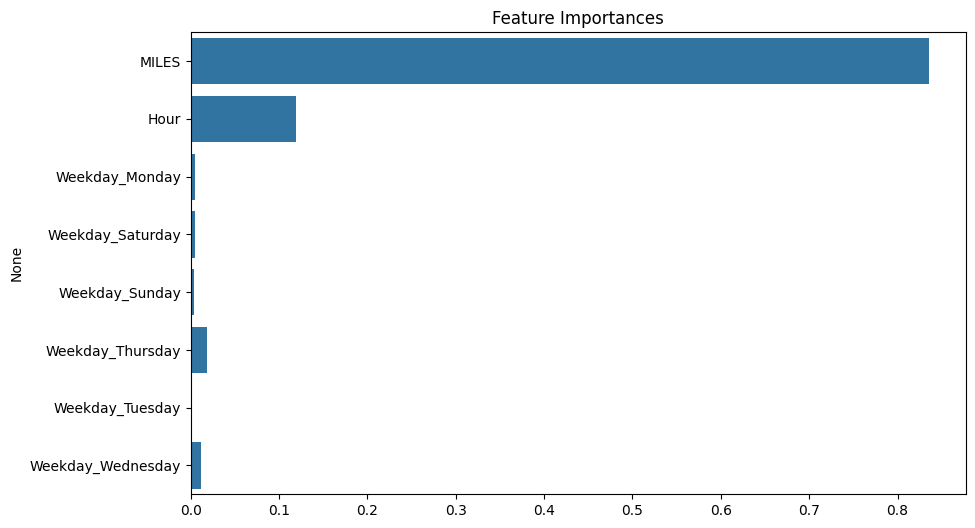

In [69]:


feature_importances = best_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


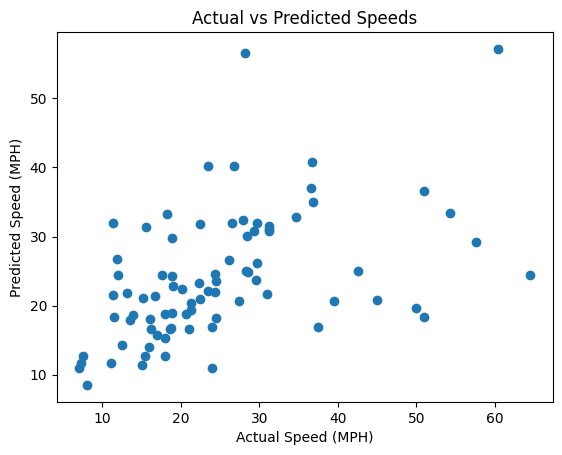

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Speed (MPH)")
plt.ylabel("Predicted Speed (MPH)")
plt.title("Actual vs Predicted Speeds")
plt.show()


In [ ]:
# Hyperparameter Tuning (GridSearchCV)

In [71]:


# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]        # Min samples at each leaf node
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
 #  Feature Importance Analysis

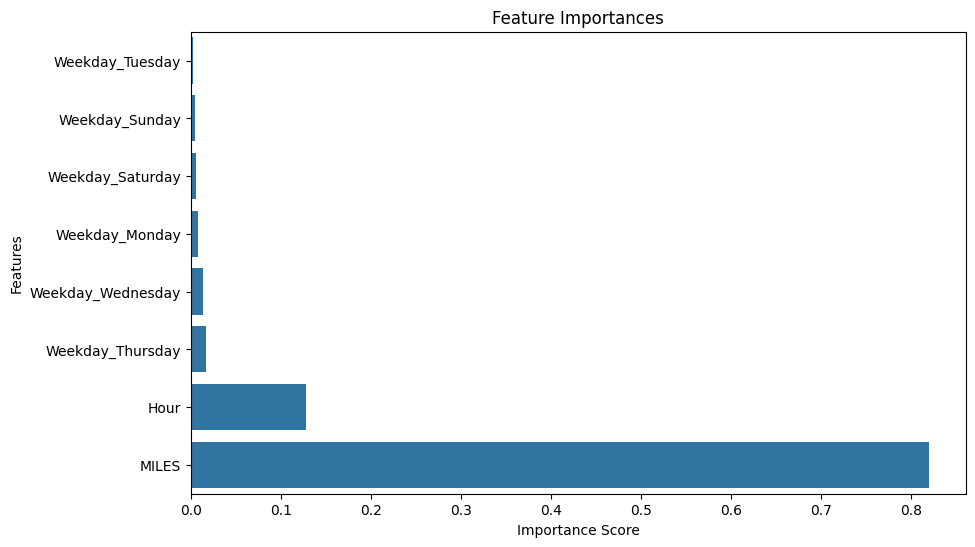

In [72]:


# Get feature importances
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Sort and plot
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
# Residual Analysis (Actual vs. Predicted Speeds)

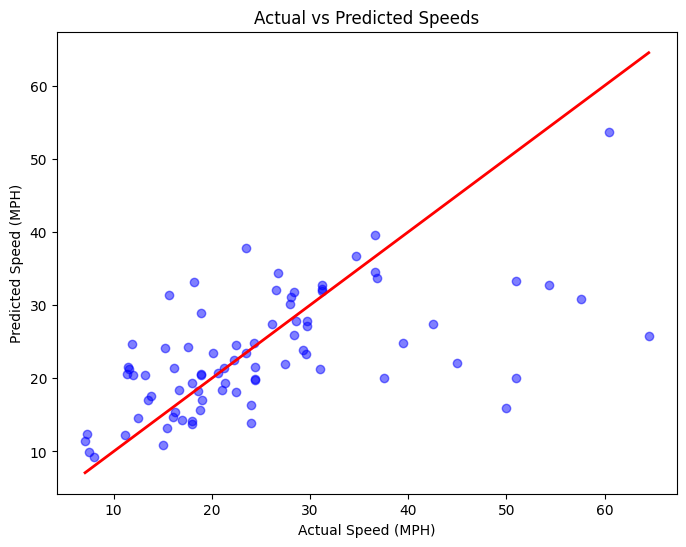

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=2)
plt.xlabel("Actual Speed (MPH)")
plt.ylabel("Predicted Speed (MPH)")
plt.title("Actual vs Predicted Speeds")
plt.show()


In [74]:
import joblib

# Save the best model
joblib.dump(best_model, "random_forest_speed_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [75]:
# Load the model
loaded_model = joblib.load("random_forest_speed_model.pkl")

# Use it for predictions
y_pred_loaded = loaded_model.predict(X_test)


In [ ]:
# model is now saved as "random_forest_speed_model.pkl"